In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.ticker import ScalarFormatter
import anndata as ad
import scanpy as sc
from sklearn.metrics import adjusted_rand_score

In [2]:
EXCLUDE = ['151507', '151672','151673']
PATIENTS = [['151508', '151509', '151510'], ['151669', '151670', '151671'], ['151674', '151675', '151676']]

### Figure 1g

In [3]:
PALETTE_DICT = {
    'DR.SC': "#CADBE9",
    'SOTIP': cm.get_cmap('Paired')(9),
    'SEDR': "#00AEEF",
    'BayesSpace': "#1C75BC",
    'STAGATE': "#2B3990",
    'CellCharter': "#ED1C24",
}

In [4]:
methods_joint = {
    'DR.SC': 'results/benchmarking/joint/ARI_DR-SC_svg2000_joint.csv',
    'SEDR': 'results/benchmarking/joint/ARI_SEDR_feat_hidden2_10_gcn_hidden2_16_pc10_gpu_joint.csv',
    'BayesSpace': 'results/benchmarking/joint/ARI_BayesSpace_hvg1000_pc15_gamma3_nrep5000_harmony-group_joint.csv',
    'STAGATE': 'results/benchmarking/joint/ARI_STAGATE_hvgs5000_hidden_dim1024_nlatent30_gpu_joint.csv',
    'CellCharter': 'results/benchmarking/joint/ARI_CellCharter_hvgs5000_nlatent5_nhoodlayers4_gpu_joint.csv',
}
palette = []
for method in methods_joint.keys():
    for keyword, color in PALETTE_DICT.items():
        if keyword in method:
            palette.append(color)

In [5]:
df_list = []
for method, path in methods_joint.items():
    df = pd.read_csv(path, index_col=0)
    
    df.columns = np.arange(df.shape[1])
    df['Sample'] = np.stack(df.index.astype(str).str.split("_"))[:, 0]
    df = df[~df['Sample'].isin(EXCLUDE)]
    df['Method'] = [method]*df.shape[0]
    df = df.reset_index(drop=True)
    df_list.append(df)
df = pd.concat(df_list)

df = pd.melt(df, id_vars=['Sample', 'Method'], var_name='Run', value_name='ARI')

In [6]:
df_combined = df.groupby(['Sample', 'Method']).mean().reset_index()

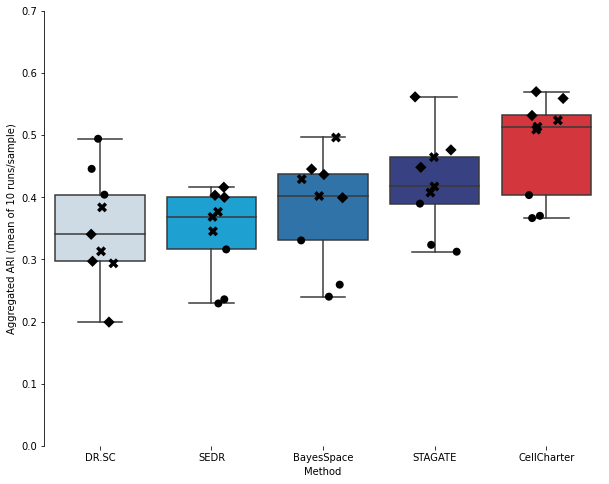

In [7]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=df_combined, x='Method', y='ARI', order=list(methods_joint.keys()), showfliers = False, palette=palette)
for patient, marker in zip(PATIENTS, ['X', 'o', 'D']):
    size = 8
    if marker == 'X':
        size = 10
    ax = sns.stripplot(data=df_combined[df_combined['Sample'].isin(patient)], x='Method', y='ARI', color='black', s=size, order=list(methods_joint.keys()), dodge=True, marker=marker, ax=ax, jitter=0.2)

plt.ylim(0.0, 0.7)
plt.ylabel('Aggregated ARI (mean of 10 runs/sample)')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Supplementary Figure 1c

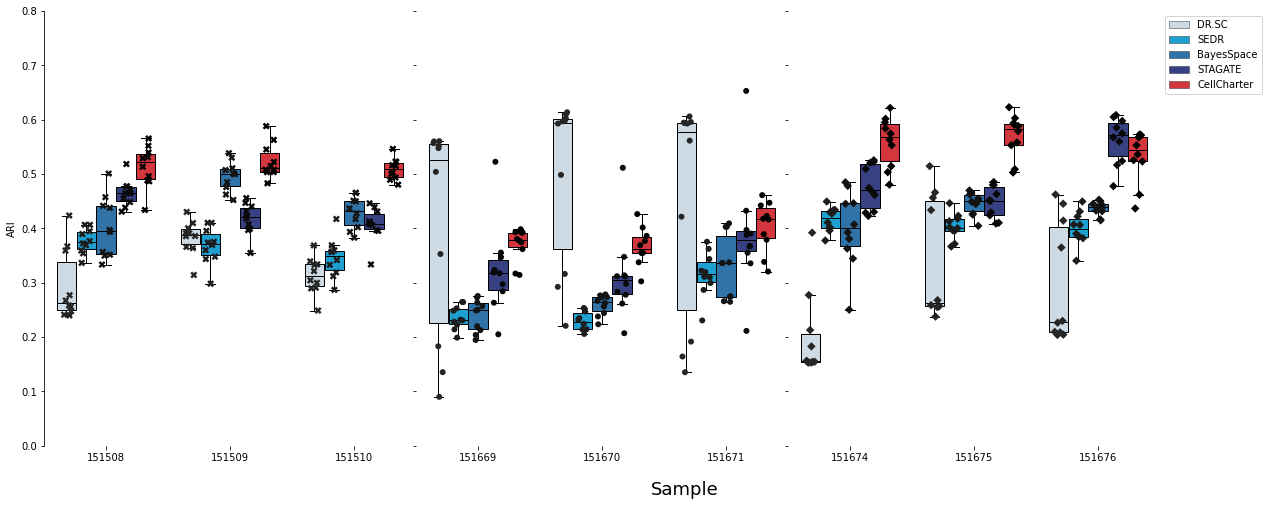

In [8]:
fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(nrows=1, ncols=3, wspace=0)
axs = gs.subplots(sharey=True)
for i, patient, marker in zip([0,1,2], PATIENTS, ['X', 'o', 'D']):
    size = 6
    if marker == 'X':
        size = 7
    axs[i] = sns.boxplot(data=df[df['Sample'].isin(patient)], x='Sample', y='ARI', hue='Method', showfliers = False, palette=palette, ax=axs[i],
                        linewidth=1,
                 boxprops={'edgecolor':'black'},
                 medianprops={'color':'black'},
                 whiskerprops={'color':'black'},
                 capprops={'color':'black'}
)
    axs[i] = sns.stripplot(data=df[df['Sample'].isin(patient)], x='Sample', y='ARI', hue='Method', color='black', dodge=True, s=size, marker=marker, ax=axs[i], jitter=0.2)
    
plt.ylim(0, 0.8)

axs[0].yaxis.set_ticks_position('left')

for ax in axs[1:]:
    ax.set_ylabel("")
    ax.spines['left'].set_visible(False)

for ax in axs:
    ax.get_legend().remove()
    ax.set_xlabel("")
    ax.grid(False)
    
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)

fig.text(0.57, 0.04, 'Sample', ha='center', fontsize=18)
handles, labels = ax.get_legend_handles_labels()
lgd = plt.legend(handles[0:len(methods_joint)], labels[0:len(methods_joint)],
            loc='upper left',bbox_to_anchor=(1, 1))


### Supplementary Figure 1b

In [9]:
PALETTE_DICT = {
    'DR.SC': "#CADBE9",
    'SOTIP': cm.get_cmap('Paired')(9),
    'SEDR': "#00AEEF",
    'BayesSpace': "#1C75BC",
    'STAGATE': "#2B3990",
    'CellCharter': "#ED1C24",
}

In [10]:
methods_individual = {
    'DR.SC': 'results/benchmarking/individual/ARI_DR-SC_svg2000.csv',
    'SEDR': 'results/benchmarking/individual/ARI_SEDR_feat_hidden2_10_gcn_hidden2_16_pc100_gpu.csv',
    'BayesSpace': 'results/benchmarking/individual/ARI_BayesSpace_hvg1000_pc15_gamma3_nrep5000.csv',
    'STAGATE': 'results/benchmarking/individual/ARI_STAGATE_hvgs5000_hidden_dim1024_nlatent30_gpu.csv',
    'SOTIP': 'results/benchmarking/individual/ARI_SOTIP_hvgs2000_pcs50_knn30_MEknn50_EMDneighbors500_individual.csv',
    'CellCharter': 'results/benchmarking/individual/ARI_CellCharter_hvgs5000_nlatent5_nhoodlayers4_gpu.csv'
}
palette = []
for method in methods_individual.keys():
    for keyword, color in PALETTE_DICT.items():
        if keyword in method:
            palette.append(color)

In [11]:
df_list = []
for method, path in methods_individual.items():
    df = pd.read_csv(path, index_col=0)

    df.columns = np.arange(df.shape[1])
    df['Sample'] = np.stack(df.index.astype(str).str.split("_"))[:, 0]
    df = df[~df['Sample'].isin(EXCLUDE)]
    df['Method'] = [method]*df.shape[0]
    df = df.reset_index(drop=True)
    df_list.append(df)
df = pd.concat(df_list)
df = pd.melt(df, id_vars=['Sample', 'Method'], var_name='Run', value_name='ARI')

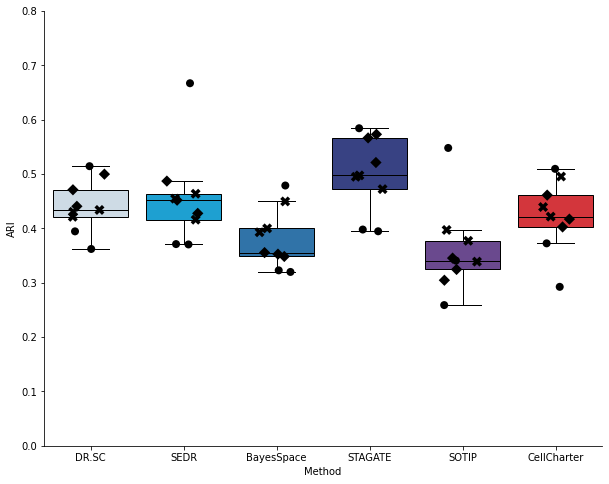

In [12]:
df_combined = df.groupby(['Sample', 'Method']).mean().reset_index()

plt.figure(figsize=(10,8))
ax = sns.boxplot(data=df_combined, 
                 x='Method', 
                 y='ARI', 
                 order=list(methods_individual.keys()), 
                 showfliers = False, 
                 palette=palette,
                 linewidth=1,
                 boxprops={'edgecolor':'black'},
                 medianprops={'color':'black'},
                 whiskerprops={'color':'black'},
                 capprops={'color':'black'})
for patient, marker in zip(PATIENTS, ['X', 'o', 'D']):
    size = 8
    if marker == 'X':
        size = 10
    ax = sns.stripplot(data=df_combined[df_combined['Sample'].isin(patient)], x='Method', y='ARI', color='black',  s=size, order=list(methods_individual.keys()), dodge=True, marker=marker, ax=ax, jitter=0.2)
ax.grid(False)
plt.ylim(0.0, 0.8)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig('results/benchmarking/sup_fig_1b.pdf', bbox_inches='tight')

### Figure 1h

In [13]:
def sizes_legend(desired_sizes, ax=None):
    ax = ax or plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    method_handles, size_handles = handles[:11], handles[11:]
    method_labels, size_labels = labels[:11], labels[11:]
    size_labels = np.array([float(l) for l in size_labels])
    desired_handles = [size_handles[np.argmin(np.abs(size_labels - d))] for d in desired_sizes]
    ax.legend(handles=method_handles+desired_handles, 
              labels=method_labels+desired_sizes, 
              title=ax.legend_.get_title().get_text(), 
              loc='upper left', 
              bbox_to_anchor=(1, 1),
              labelspacing=1.05,
              handletextpad=1.3, 
              borderpad=1.2
             )

In [14]:
PALETTE_DICT = {
    'SEDR (CPU)': "#00AEEF",
    'SEDR (GPU)': "#00AEEF",
    'SOTIP (CPU)': cm.get_cmap('Paired')(9),
    'BayesSpace (CPU)': "#1C75BC",
    'STAGATE (CPU)': "#2B3990",
    'STAGATE (GPU)': "#2B3990",
    'CellCharter (GPU)': "#ED1C24",
    'CellCharter (CPU)': "#ED1C24",
}

In [15]:
methods_time = {
    'SEDR (CPU)': 'results/benchmarking/time/time_SEDR_feat_hidden2_10_gcn_hidden2_16_pc10_cpu_ncpus4.csv',
    'SEDR (GPU)': 'results/benchmarking/time/time_SEDR_feat_hidden2_10_gcn_hidden2_16_pc10_gpu_ncpus4.csv',

    'SOTIP (CPU)': 'results/benchmarking/time/time_SOTIP_hvgs2000_nlatent10_knn30_MEknn50_EMDneighbors500_ncpus4.csv',


    'BayesSpace (CPU)': 'results/benchmarking/time/time_BayesSpace_hvg1000_pc15_gamma3_nrep5000_harmony-group_ncpus4.csv',

    'STAGATE (CPU)': 'results/benchmarking/time/time_STAGATE_hvgs5000_hidden_dim1024_nlatent30_cpu_ncpus4.csv',
    'STAGATE (GPU)': 'results/benchmarking/time/time_STAGATE_hvgs5000_hidden_dim1024_nlatent30_gpu_ncpus4.csv',

    'CellCharter (CPU)': 'results/benchmarking/time/time_CellCharter_hvgs5000_nlatent5_nhoodlayers4_cpu_ncpus4.csv',
    'CellCharter (GPU)': 'results/benchmarking/time/time_CellCharter_hvgs5000_nlatent5_nhoodlayers4_gpu_ncpus4.csv',
}

In [16]:
times = None
for method, path in methods_time.items():
    times_df = pd.read_csv(path, index_col=0)
    times_df['Time (min)'] = times_df[[col for col in times_df.columns if col != 'n_samples']].sum(axis=1) / 60
    times_df['Method'] = method
    times_df['N. samples'] = times_df['n_samples']
    times = pd.concat((times, times_df[['N. samples', 'Time (min)', 'Method']]), axis=0)

In [17]:
times_mean = times.groupby(['N. samples', 'Method']).mean().reset_index()
times_mean.index = times_mean[['N. samples', 'Method']]

In [18]:
methods_memory = {    
    'SEDR (CPU)': 'results/benchmarking/memory/memory_SEDR_feat_hidden2_10_gcn_hidden2_16_pc100_cpu.csv',
    'SEDR (GPU)': 'results/benchmarking/memory/memory_SEDR_feat_hidden2_10_gcn_hidden2_16_pc100_cpu.csv',

    'SOTIP (CPU)': 'results/benchmarking/memory/memory_SOTIP_hvgs2000_nlatent10_knn30_MEknn50_EMDneighbors500.csv',
    
    'BayesSpace (CPU)': 'results/benchmarking/memory/memory_BayesSpace_hvg1000_pc15_gamma3_nrep5000_harmony-group.csv',
    
    'STAGATE (CPU)': 'results/benchmarking/memory/memory_STAGATE_hvgs5000hidden_dim1024_nlatent30_cpu.csv',
    'STAGATE (GPU)': 'results/benchmarking/memory/memory_STAGATE_hvgs5000hidden_dim1024_nlatent30_cpu.csv',
    
    'CellCharter (CPU)': 'results/benchmarking/memory/memory_CellCharter_hvgs5000_nlatent5_nhoodlayers4_cpu.csv',
    'CellCharter (GPU)': 'results/benchmarking/memory/memory_CellCharter_hvgs5000_nlatent5_nhoodlayers4_cpu.csv'
}

In [19]:
memory = None
for method, path in methods_memory.items():
    memory_df = pd.read_csv(path)
    memory_df.columns = ['N. samples', method]
    memory_df = memory_df[memory_df['N. samples'] > 1]
    memory = memory.merge(memory_df, on='N. samples', how='left') if memory is not None else memory_df
    
memory = pd.melt(memory, id_vars='N. samples', var_name='Method', value_name='Memory (GB)')
memory['Memory (GB)'] /= 1000

In [20]:
benchmark = times.merge(memory, left_on=['N. samples', 'Method'], right_on=['N. samples', 'Method'])

/home/varrone/miniconda3/envs/lupus/lib/python3.8/site-packages/seaborn/relational.py:650: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


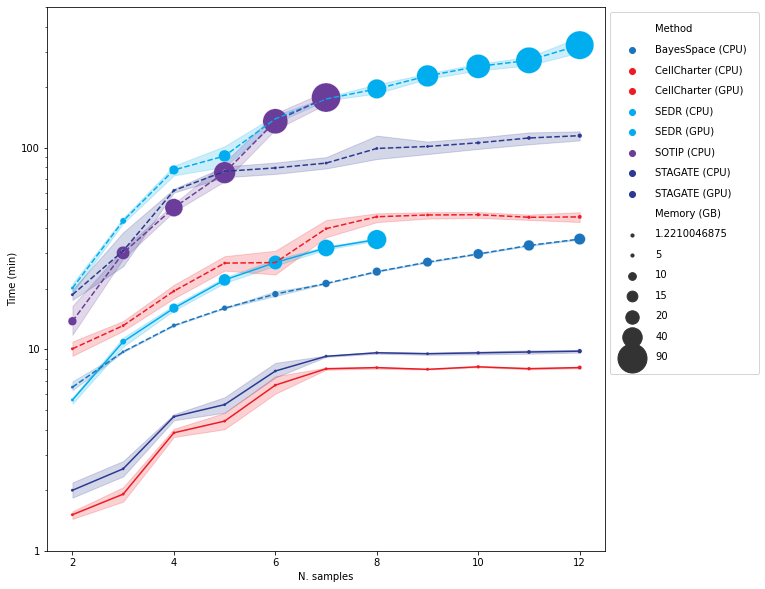

In [21]:
plt.figure(figsize=(10,10))
ax =sns.lineplot(data=benchmark, 
                x='N. samples', 
                y='Time (min)', 
                hue='Method',
                palette=PALETTE_DICT,
                 legend=False
)
ax = sns.scatterplot(data=times_mean.merge(memory, left_on=['N. samples', 'Method'], right_on=['N. samples', 'Method']), 
                x='N. samples', 
                y='Time (min)', 
                size='Memory (GB)', 
                hue='Method',
                size_norm=(5, 90),
                sizes=(10, 900),
                palette=PALETTE_DICT, legend='full')

sizes_legend([5, 10, 15, 20, 40, 90], ax)

for i, name in enumerate(methods_memory.keys()):
    if 'CPU' in name:
        ax.lines[i].set_linestyle('--')

plt.grid(False)
plt.yscale('log')
plt.ylim(1, 500)
ax.yaxis.set_major_formatter(ScalarFormatter())
#plt.savefig('results/benchmarking/fig_1h.pdf', bbox_inches='tight')

### Supplementary Figure 1d

In [22]:
PALETTE_DICT = {
    'Dimensionality reduction': "#006838",
    'Spatial embedding': "#009444",
    'Clustering': "#8DC63F"
}

In [23]:
def unify_cols(df):
    df = df.rename(columns={
        'aggregate_neighbors': 'Spatial embedding',
        'spatial_embedding': 'Spatial embedding'
    })

    df['Dimensionality reduction'] = df['load_data'] + df['preprocess'] + df['scvi']
    df['Clustering'] = df['cluster']
    df[['Dimensionality reduction', 'Spatial embedding', 'Clustering']] /= 60
    return df

In [24]:
times = None
for method in ['STAGATE (CPU)', 'CellCharter (CPU)']:
    path = methods_time[method]
    times_method = pd.read_csv(path, index_col=0)
    times_method[[col for col in times_method.columns if col != 'n_samples']]
    times_method['Method'] = method
    times_method['N. samples'] = times_method['n_samples']
    times_method = unify_cols(times_method)
    
    times = pd.concat((times, times_method), axis=0)

In [25]:
times = times[times['N. samples'] == 12].groupby('Method').mean()

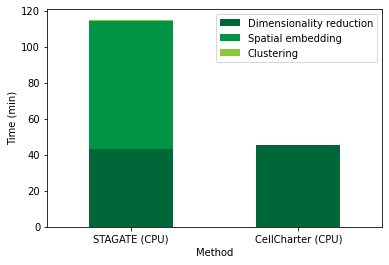

In [26]:
times.loc[['STAGATE (CPU)', 'CellCharter (CPU)'], ['Dimensionality reduction', 'Spatial embedding', 'Clustering']].plot.bar(stacked=True, color=PALETTE_DICT)
plt.ylabel('Time (min)')
plt.xticks(rotation=0)
plt.show()

### Figure 1j

In [27]:
times = pd.read_csv('results/benchmarking/time_codex/time_codex_spleen_CellCharter_STAGATE.csv', index_col=0)
times /= 60

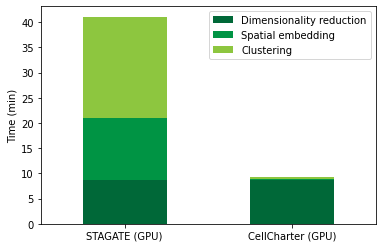

In [28]:
times.loc[['STAGATE (GPU)', 'CellCharter (GPU)'], ['Dimensionality reduction', 'Spatial embedding', 'Clustering']].plot.bar(stacked=True, color=PALETTE_DICT)
plt.ylabel('Time (min)')
plt.xticks(rotation=0)
plt.show()

### Figure 1h

In [29]:
LABELS_PATHS = {
    'DR.SC': 'results/benchmarking/labels/labels_DR-SC_svg2000_joint.csv',
    'BayesSpace': 'results/benchmarking/labels/labels_BayesSpace_hvg1000_pc15_gamma3_nrep5000_harmony-group_joint.csv',
    'SEDR': 'results/benchmarking/labels/labels_SEDR_feat_hidden2_10_gcn_hidden2_16_pc10_gpu_joint.csv',
    'STAGATE': 'results/benchmarking/labels/labels_STAGATE_hvgs5000_hidden_dim1024_nlatent30_gpu_joint.csv',
    'CellCharter': 'results/benchmarking/labels/labels_CellCharter_hvgs5000_nlatent5_nhoodlayers4_gpu_joint.csv'
}

In [30]:
LABELS_REPLACEMENTS = {
    'DR.SC': {
        6: 0,
        3: 1,
        2: 2,
        0: 3,
        4: 4
    },
    'BayesSpace': {
        3: 0,
        6: 1,
        4: 2,
        0: 3,
        5: 4,
        1: 5,
        2: 6
    },
    'SEDR': {
        6: 0,
        1: 1,
        3: 2,
        2: 3,
        0: 4,
        4: 5,
        5: 6,
        
    },
    'STAGATE': {
        7: 0,
        1: 1,
        2: 2,
        3: 3,
        5: 4,
        4: 5,
        6: 6
    },
    'CellCharter': {
        4: 0,
        1: 1,
        5: 2,
        2: 3,
        0: 4, 
        3: 5,
        6: 6,
    },
    'Manual annotation': {
        'WM': 0,
        'Layer6': 1,
        'Layer5': 2,
        'Layer4': 3,
        'Layer3': 4,
        'Layer2': 5,
        'Layer1': 6,
        'NA': 7,
        
    }
}

In [31]:
adata = ad.read_h5ad('data/Visium_DLPFC/preprocessed_h5ad/151675.h5ad')
adata.obsm['spatial'][:, 1] = np.max(adata.obsm['spatial'][:, 1]) - adata.obsm['spatial'][:, 1]

for method, path in LABELS_PATHS.items():
    labels = pd.read_csv(path, index_col=0)
    labels = labels[labels['sample'] == 151675]
    best_run = np.argmax([adjusted_rand_score(labels[col][~adata.obs['sce.layer_guess'].isna()], adata.obs['sce.layer_guess'][~adata.obs['sce.layer_guess'].isna()]) for col in labels.columns if col.startswith('cluster_')])
    labels = labels[np.array([col for col in labels.columns if col.startswith('cluster_')])[best_run]]
    labels = labels.rename(method)
    adata.obs = adata.obs.join(labels)
    adata.obs[method] = pd.Categorical(adata.obs[method])

# Replace column name sce.layer_guss with 'Manual annotation'
adata.obs = adata.obs.rename(columns={'sce.layer_guess': 'Manual annotation'})

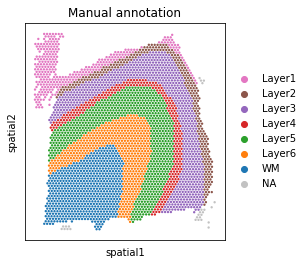

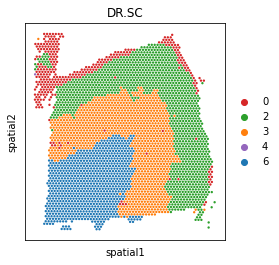

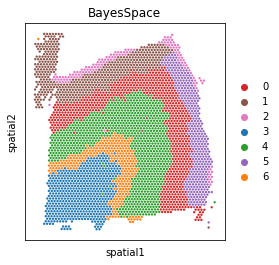

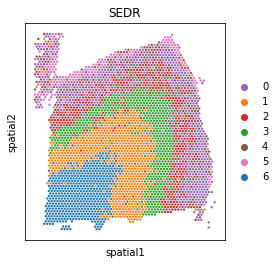

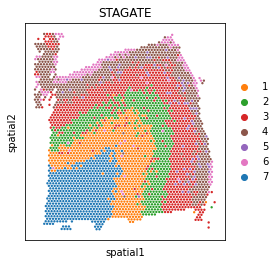

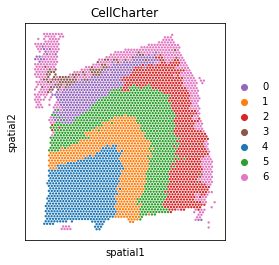

In [32]:
ax = sc.pl.spatial(
    adata, 
    palette={l: cm.get_cmap('tab10')(LABELS_REPLACEMENTS['Manual annotation'][l]) for l in adata.obs['Manual annotation'].cat.categories}, 
    color='Manual annotation',
    return_fig=True, 
    show=False, 
    size=1.15,
    scale_factor=800,
    na_color='#C2C2C2',
    title='Manual annotation',
)

for method, path in LABELS_PATHS.items():
    ax = sc.pl.spatial(
        adata, 
        palette={l: cm.get_cmap('tab10')(LABELS_REPLACEMENTS[method][l]) for l in adata.obs[method].cat.categories}, 
        color=method,
        return_fig=True, 
        show=False, 
        size=1.15,
        scale_factor=800,
        na_color='#C2C2C2',
        title=method,
    )